## Decision Tree

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
from IPython.display import display

### Read Play Tennis Data

In [2]:
pt=pd.read_csv('/home/utk.tennessee.edu/nnaraya2/SanDisk/UTPB/Play Tennis.csv', index_col=0)
pt.shape

(14, 5)

In [3]:
pt

,Outlook,Temprature,Humidity,Wind,Play_Tennis
Day,,,,,
D1,Sunny,Hot,High,Weak,No
D2,Sunny,Hot,High,Strong,No
D3,Overcast,Hot,High,Weak,Yes
D4,Rain,Mild,High,Weak,Yes
D5,Rain,Cool,Normal,Weak,Yes
D6,Rain,Cool,Normal,Strong,No
D7,Overcast,Cool,Normal,Strong,Yes
D8,Sunny,Mild,High,Weak,No
D9,Sunny,Cool,Normal,Weak,Yes


**Dataset has**
  
**Number of Observations: 14**

**Input Variables: Outlook, Temperature, Humidity, Wind**

**Output Variables: Play Tennis (Yes or No) – Categorical**

## Preprocess Data

In [4]:
# encode string to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                    
pt=pt.apply(string_to_int.fit_transform) #fit and transform it
pt

,Outlook,Temprature,Humidity,Wind,Play_Tennis
Day,,,,,
D1,2,1,0,1,0
D2,2,1,0,0,0
D3,0,1,0,1,1
D4,1,2,0,1,1
D5,1,0,1,1,1
D6,1,0,1,0,0
D7,0,0,1,0,1
D8,2,2,0,1,0
D9,2,0,1,1,1


### Feature Coding

We have the following transfroamtions:

**Outlook: Overcast-0, Rain-1, Sunny-2**

**Temperature: Cool-0, Hot-1, Mild-2,**

**Humidity: High-0, Normal-1,**

**Wind: Strong-0, Weak-1,**

**Play Tennis: No-0, Yes-1**

# To construct a decision tree so as to answer the question of whether we should go out to play tennis, first we need to answer the following questions:

1. **How to decide which feature or variable will become Root Node, i.e. the node which is at the top?**

2. **Once we decide on the root node, we then have to figure out which variable will be Decision Node?**



# Decision Tree Root Node Selection

We select a variable as the **Root Node** which:
- Provides the most information about our target variable.
- Reduces uncertainty the most.

### Example:
We select the variable as the root node that **affects the final decision of playing tennis the most**.

## Measuring Uncertainty

To measure uncertainty, we use the following methods:

### 1. **ID3 Algorithm (Information Gain - Entropy Based)**
- Measures uncertainty using **Entropy**.
- Selects the feature with **highest Information Gain** (i.e., the one that reduces uncertainty the most).

#### **Entropy Formula:**
$$
H(S) = - \sum_{i=1}^{c} p_i \log_2 p_i
$$
where:
- \( H(S) \) = Entropy of the dataset \( S \).
- \( p_i \) = Proportion of instances belonging to class \( i \).
- \( c \) = Number of classes.

#### **Information Gain Formula:**
$$
IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v)
$$
where:
- \( IG(S, A) \) = Information Gain of attribute \( A \).
- \( H(S) \) = Entropy of dataset \( S \).
- \( S_v \) = Subset of \( S \) where attribute \( A \) has value \( v \).

### 2. **CART Algorithm (Gini Index)**
- Uses **Gini Impurity** to measure uncertainty.
- Selects the feature that gives the **lowest Gini Index**, meaning it creates purer splits.

#### **Gini Impurity Formula:**
$$
Gini(S) = 1 - \sum_{i=1}^{c} p_i^2
$$
where:
- \( Gini(S) \) = Gini impurity of dataset \( S \).
- \( p_i \) = Proportion of instances belonging to class \( i \).
- \( c \) = Number of classes.

### Summary:
- **ID3 (Entropy & Information Gain)** selects the feature with the highest information gain.
- **CART (Gini Index)** selects the feature with the lowest Gini impurity.

Using these methods, we determine the best feature to be the **Root Node** in our decision tree.


### We will be using Gini impurity formula for our construction of decision tree

### Let us try different variables as Root Nodes to understand a decision tree can be constructed

## Construct and Plot the decision Tree

In [5]:
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

def train_decision_tree(features):
    """
    Train Decision Tree using selected features and visualize it properly.

    Parameters:
        features (list): List of feature column names to use in the model.
    """
    X = pt[features]  # Select user-defined features
    y = pt['Play_Tennis']  # Target Variable

    # Train Decision Tree using Gini Index
    clf = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=None, min_samples_split=2, min_samples_leaf=1)
    clf.fit(X, y)

    print("Decision Tree for Play Tennis Dataset")
    print("This decision tree uses the Gini Index to classify whether to Play Tennis based on weather conditions.")
    print(f"Tree Depth: {clf.get_depth()}")
    print(f"Number of Leaves: {clf.get_n_leaves()}")

    # Display in Jupyter Notebook (Graphviz)
    dot_data = export_graphviz(
        clf, 
        out_file=None,  
        feature_names=features,
        class_names=["No", "Yes"],
        filled=True,
        rounded=True,
        special_characters=True
    )
    
    graph = graphviz.Source(dot_data)
    display(graph)

## "Outlook" as Root Node

Decision Tree for Play Tennis Dataset
This decision tree uses the Gini Index to classify whether to Play Tennis based on weather conditions.
Tree Depth: 2
Number of Leaves: 3


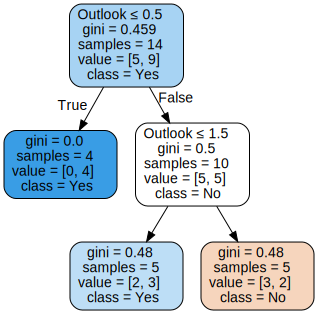

In [6]:
#Creating decision tree usig the variable "Outlook"
train_decision_tree(['Outlook'])

### Interpretation:
**If “Outlook < 0.5” (meaning Overcast), then “Play Tennis”**

**If “0.5 < Outlook < 1.5” (meaning Rain), then “Don’t Play Tennis”**

Decision Tree for Play Tennis Dataset
This decision tree uses the Gini Index to classify whether to Play Tennis based on weather conditions.
Tree Depth: 2
Number of Leaves: 3


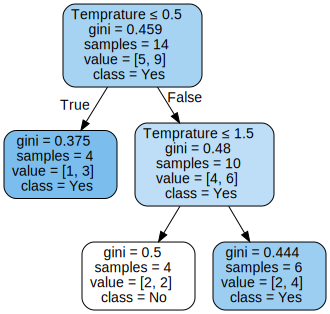

In [7]:
# Creating Decision Tree using 'Temperature'
train_decision_tree(['Temprature'])

### Interpretation:
**If “Temperature < 0.5” (meaning Cold), then “Play Tennis”**

**If “0.5 < Temperature < 1.5” (meaning Hot), then “Don’t Play Tennis”**

**If “Temperature > 1.5” (meaning Mild), then “Play Tennis”**

### Using all the features

Decision Tree for Play Tennis Dataset
This decision tree uses the Gini Index to classify whether to Play Tennis based on weather conditions.
Tree Depth: 4
Number of Leaves: 7


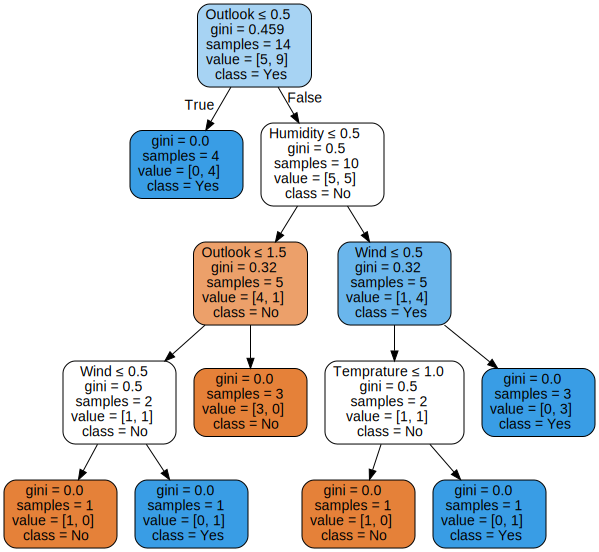

In [8]:
train_decision_tree(['Outlook', 'Temprature', 'Humidity', 'Wind'])

### Interpretation

**The most important feature to consider while making the decision is "".**

**According to the above tree, if the Outlook is 'Rainy' i.e. "Outlook"=1, Temperature is 'Mild' i.e. "Temperature"=2, Humidity is High i.e. 'Humidity"=0, Wind is Weak i.e. "Wind"=1,then what will be the final decision of the player?**
